# SBND-PRISM Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import math
from prism_tools import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

_center_x = -73.78 # cm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Open files

In [5]:
def get_ak_fv_cut():
    return '(nu_vtx_x > -183.5) & (nu_vtx_x < 183.5) & (nu_vtx_y > -370/2) & (nu_vtx_y < 370/2)'


Select branches to read.
All available branches are listed here:
https://github.com/SBNSoftware/sbndcode/blob/mdeltutt_sbnd_prism/sbndcode/SBNDPrism/PrismAnalyzer_module.cc#L95-L159

In [12]:
branches = ['nu_pdg', 'nu_ccnc', 'nu_mode', 'nu_e', 'nu_vtx_x', 'nu_vtx_y', 'nu_vtx_z', 'nu_oaa']


In [6]:
_df = {}
_df_pot = {}

#
# BNB
#
file = uproot.open("~/Work/SBND/Prism/files/sbndprism_ana_sbnd_bnb_v09_42_00_v10.root")
_df_pot['bnb'] = file['prismana/pottree'].arrays(['pot'], library="pd")

cut = '(nu_ccnc == 0) & (nu_pdg == 14) & ' + get_ak_fv_cut()
_df['numu_cc'] = file['prismana/tree'].arrays(branches, cut, library="pd")

cut = '(nu_ccnc == 0) & (nu_pdg == -14) & ' + get_ak_fv_cut()
_df['anumu_cc'] = file['prismana/tree'].arrays(branches, cut, library="pd")

#
# nue intrinsic
#
file = uproot.open("~/Work/SBND/Prism/files/sbndprism_ana_sbnd_nueintr_v09_42_00_v10.root")
_df_pot['nue_intr'] = file['prismana/pottree'].arrays(['pot'], library="pd")

cut = '(nu_ccnc == 0) & (nu_pdg == 12) & ' + get_ak_fv_cut()
_df['nue_cc'] = file['prismana/tree'].arrays(branches, cut, library="pd")

cut = '(nu_ccnc == 0) & (nu_pdg == -12) & ' + get_ak_fv_cut()
_df['anue_cc'] = file['prismana/tree'].arrays(branches, cut, library="pd")


In [7]:
_df['numu_cc'].head()

,nu_pdg,nu_ccnc,nu_mode,nu_e,nu_vtx_x,nu_vtx_y,nu_vtx_z,nu_oaa
0,14,0,0,0.803447,-155.829254,-30.207981,485.269836,0.007613
3,14,0,2,2.587900,78.746162,172.837677,365.987457,0.020278
5,14,0,0,0.383647,102.023636,-129.948151,245.517761,0.019438
6,14,0,2,5.099327,-123.550369,-64.986366,290.242188,0.007250
7,14,0,1,2.230954,91.664597,-117.292717,315.576263,0.017921


## Get file POT

In [8]:
pot_target = 6.6e20

pot_bnb = np.sum(_df_pot['bnb']['pot'].to_numpy())
pot_nue_intr = np.sum(_df_pot['nue_intr']['pot'].to_numpy())

_scale = {
    'bnb': pot_target / pot_bnb,
    'nue_intr': pot_target / pot_nue_intr,
}

_scale['numu_cc'] = _scale['bnb']
_scale['anumu_cc'] = _scale['bnb']
_scale['nue_cc'] = _scale['nue_intr']
_scale['anue_cc'] = _scale['nue_intr']

print('BNB POT:', pot_bnb)
print('NuE Intr. POT:', pot_nue_intr)


BNB POT: 1.104046776281961e+20
NuE Intr. POT: 1.3592852872055325e+22


In [9]:
print('Total number of numu CC events:', len(_df['numu_cc']) * _scale['numu_cc'])
print('Total number of nue CC events:', len(_df['nue_cc']) * _scale['nue_cc'])


Total number of numu CC events: 3599107.289078477
Total number of nue CC events: 26119.29837995196


In [10]:
math.radians(1.)

0.017453292519943295

## Plot muon neutrino energy

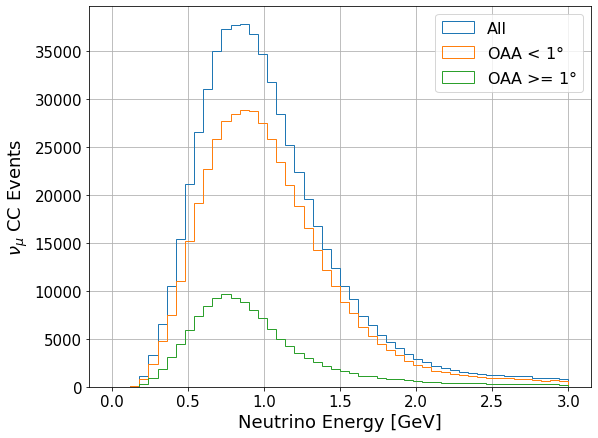

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9, 7))

data = _df['numu_cc']['nu_e'].values
ax.hist(data, range=[0, 3], bins=50,
        histtype='step',
        label=r'All')

data = _df['numu_cc'].query('nu_oaa < 0.0174')['nu_e'].values
ax.hist(data, range=[0, 3], bins=50,
        histtype='step',
        label=r'OAA < 1$\degree$')

data = _df['numu_cc'].query('nu_oaa >= 0.0174')['nu_e'].values
ax.hist(data, range=[0, 3], bins=50,
        histtype='step',
        label=r'OAA >= 1$\degree$')
    
ax.legend(fontsize=16, loc='best')
ax.set_ylabel(r'$\nu_{\mu}$ CC Events', fontsize=18)
ax.set_xlabel('Neutrino Energy [GeV]',fontsize=18)
ax.tick_params(labelsize=15)
ax.grid(True)

# plt.savefig('numu_events.pdf')
plt.show()
